# <center>Laboratorium 9<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [92]:
import main
import numpy as np
import scipy
import scipy.optimize
import matplotlib
import matplotlib.pyplot as plt
import math

#expected = dill.load(open('expected','rb'))

#results_bisection = expected['bisection']
#f = results_bisection[12][2]
#a = results_bisection[12][1]

#f(a)

def plot_fun(x, y, xlab='', ylab='', title=''):
    plt.semilogx(x,y)

    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)

    plt.grid()
    plt.show()

***Temat główny:***

Znajdź miejsca zerowe funkcji: 
$$ 
f(x) = e^{-2x} + x^2 - 1
$$,

metodami:
* Bisekcji,
* Siecznych,
* Newtona

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Wykonaj wykres funckji oraz jej pierwszej i drugiej pochodnej (obliczonej analitycznie) na jednym rysunku w przedziale pozwalającym na zgrubne określenie miejsc zerowych. Wykres powinien być odpowiednio opisany. Określ przedział miejsca zerowego.

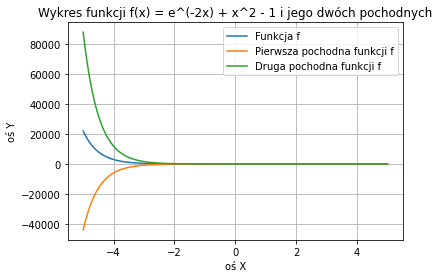

In [52]:
y = lambda a : np.exp(-2*a) + a**2 - 1
x = np.linspace(-5, 5, 1000)
dy = lambda x : 2*x - 2*np.exp(-2*x)
d2y = lambda x :  2 + 4*np.exp(-2*x)

plt.plot(x, y(x), label="Funkcja f")
plt.plot(x, dy(x), label="Pierwsza pochodna funkcji f")
plt.plot(x, d2y(x), label="Druga pochodna funkcji f")
plt.grid()
plt.xlabel("oś X")
plt.ylabel("oś Y")
plt.title("Wykres funkcji f(x) = e^(-2x) + x^2 - 1 i jego dwóch pochodnych")
plt.legend()

***Zadanie 2.***  
Zaimplementuj [metodę bisekcji](https://en.wikipedia.org/wiki/Bisection_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) funkcja na końcach przedziału przyjmuje przeciwne znaki

***Zadanie 3.***  
Zaimplementuj [metodę siecznych](https://en.wikipedia.org/wiki/Secant_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadanie 4.***  
Zaimplementuj [metodę Newtona](https://en.wikipedia.org/wiki/Newton%27s_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadania 5.***  
Dla głównej funkcji z zadania 1 znajdź miejsca zerowe przy użyciu:

* funkcji root dostępnej w pakiecie scipy.optimize
* funkcji fsolve dostępnej w pakiecie scipy.optimize

In [97]:
x1 = scipy.optimize.root(y, [-1, 1])
print("Wynik funkcji root: ", x1.x)

x2 = scipy.optimize.fsolve(y, [-1,1])
print("Wynik funkcji fsolve: ", x2)

Wynik funkcji root:  [1.12461220e-16 9.16562583e-01]
Wynik funkcji fsolve:  [1.12461220e-16 9.16562583e-01]


***Zadanie 6.***  
Dla głównej funkcji oraz przedziału zdefiniowanego z zadania 1 znajdź miejsca zerowe przy użyciu:

* metody bisekcji
* metody siecznych
* metody Newtona

z tolerancją $10^{-10}$

Zbadaj dokładność(względem rozwiązania z zadania 5) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

**Metoda bisekcji**

Przy próbie zadania przedziału w którym spodziewamy się pierwiastków analogicznego do tego z zadania 5, nie zostanie spełniony warunek
mówiący o przeciwnych znakach wartości funkcji na krańcach tego przedziału, dlatego, żeby otrzymać wszystkie (2) pierwiastki podzieliłem
przedział na dwie części.

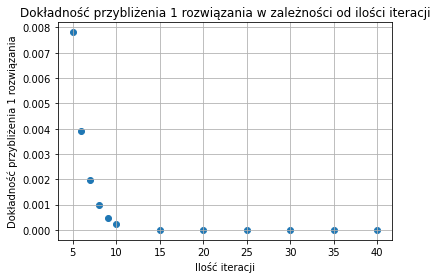

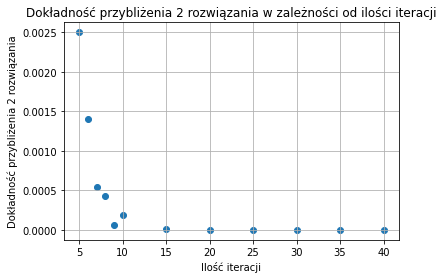

In [42]:
iterations = [5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40]
bisection_res1 = []
bisection_inx1 = []

bisection_res2 = []
bisection_inx2 = []
for iter in iterations:
    bisection_res1.append(np.abs(main.bisection(-1, 0.5, y, 10e-10, iter)[0] - x2[0]))
    bisection_inx1.append(main.bisection(-1, 0.5, y, 10e-10, iter)[1])
    bisection_res2.append(np.abs(main.bisection(0.5, 1, y, 10e-10, iter)[0] - x2[1]))
    bisection_inx2.append(main.bisection(0.5, 1, y, 10e-10, iter)[1])

plt.scatter(iterations, bisection_res1)
plt.xlabel("Ilość iteracji")
plt.ylabel("Dokładność przybliżenia 1 rozwiązania")
plt.title("Dokładność przybliżenia 1 rozwiązania w zależności od ilości iteracji metoda bisekcji")
plt.grid()
plt.show()

plt.scatter(iterations, bisection_res2)
plt.xlabel("Ilość iteracji")
plt.ylabel("Dokładność przybliżenia 2 rozwiązania")
plt.title("Dokładność przybliżenia 2 rozwiązania w zależności od ilości iteracji metoda bisekcji")
plt.grid()
plt.show()


687 ns ± 146 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
732 ns ± 280 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
651 ns ± 119 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 10.56 times longer than the fastest. This could mean that an intermediate result is being cached.
834 ns ± 682 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
626 ns ± 11.6 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
631 ns ± 70.1 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
620 ns ± 14.8 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
625 ns ± 26.8 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)


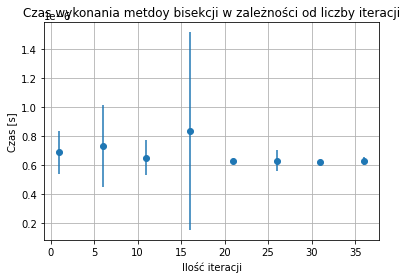

In [45]:
err = []
time = []
iterations = np.arange(1, 40, 5)
for iter in iterations:
    avg_time = %timeit -r 100 -n 100 -o main.bisection(-1, 0.5, y, 10e-10, iter)
    time.append(avg_time.average)
    err.append(avg_time.stdev)

plt.errorbar(iterations, time, yerr=err, marker='o', linestyle="none")
plt.ylabel("Czas [s]")
plt.xlabel("Ilość iteracji")
plt.title("Czas wykonania metdoy bisekcji w zależności od liczby iteracji metoda bisekcji")
plt.grid()
plt.show()

**Metoda siecznych**

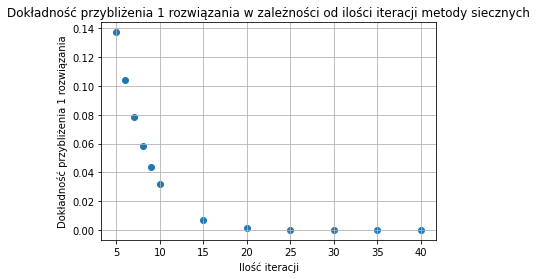

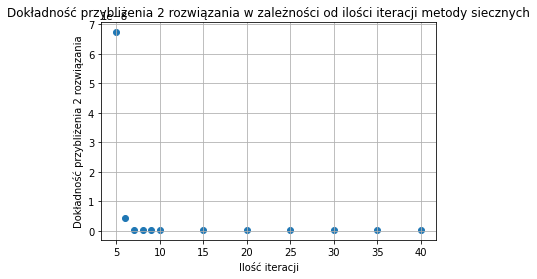

In [47]:
iterations = [5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40]
secant_res1 = []
secant_inx1 = []

secant_res2 = []
secant_inx2 = []
for iter in iterations:
    secant_res1.append(np.abs(main.secant(-1, 0.5, y, 10e-10, iter)[0] - x2[0]))
    secant_inx1.append(main.secant(-1, 0.5, y, 10e-10, iter)[1])
    secant_res2.append(np.abs(main.secant(0.5, 1, y, 10e-10, iter)[0] - x2[1]))
    secant_inx2.append(main.secant(0.5, 1, y, 10e-10, iter)[1])

plt.scatter(iterations, secant_res1)
plt.xlabel("Ilość iteracji")
plt.ylabel("Dokładność przybliżenia 1 rozwiązania")
plt.title("Dokładność przybliżenia 1 rozwiązania w zależności od ilości iteracji metody siecznych")
plt.grid()
plt.show()

plt.scatter(iterations, secant_res2)
plt.xlabel("Ilość iteracji")
plt.ylabel("Dokładność przybliżenia 2 rozwiązania")
plt.title("Dokładność przybliżenia 2 rozwiązania w zależności od ilości iteracji metody siecznych")
plt.grid()
plt.show()

The slowest run took 11.05 times longer than the fastest. This could mean that an intermediate result is being cached.
831 ns ± 648 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 4.33 times longer than the fastest. This could mean that an intermediate result is being cached.
1.13 µs ± 351 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 7.57 times longer than the fastest. This could mean that an intermediate result is being cached.
1.02 µs ± 561 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
871 ns ± 343 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
839 ns ± 370 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 7.28 times longer than the fastest. This could mean that an intermediate result is being cached.
1.19 µs ± 463 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
844 ns ± 115 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
731 ns ± 151 ns per 

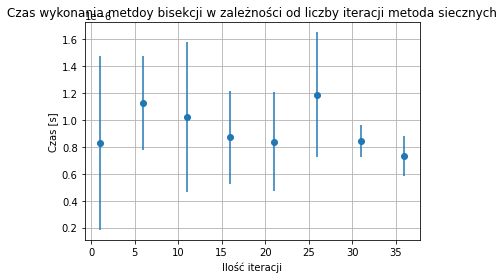

In [49]:
err = []
time = []
iterations = np.arange(1, 40, 5)
for iter in iterations:
    avg_time = %timeit -r 100 -n 100 -o main.secant(-1, 0.5, y, 10e-10, iter)
    time.append(avg_time.average)
    err.append(avg_time.stdev)

plt.errorbar(iterations, time, yerr=err, marker='o', linestyle="none")
plt.ylabel("Czas [s]")
plt.xlabel("Ilość iteracji")
plt.title("Czas wykonania metdoy bisekcji w zależności od liczby iteracji metoda siecznych")
plt.grid()
plt.show()

**Metoda Newtona**

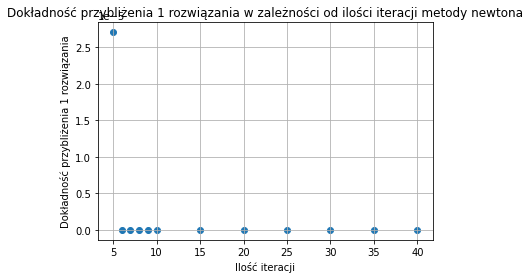

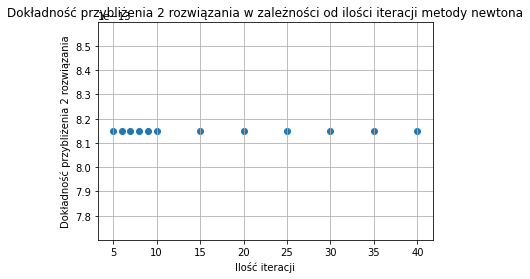

In [95]:
iterations = [5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40]
newton_res1 = []
newton_inx1 = []

newton_res2 = []
newton_inx2 = []
for iter in iterations:
    newton_res1.append(np.abs(main.newton(y, dy, d2y, -1.5, 0.40, 10e-10, iter)[0] - x2[0]))
    newton_inx1.append(main.newton(y, dy, d2y, -1.5, 0.40, 10e-10, iter)[1])
    newton_res2.append(np.abs(main.newton(y, dy, d2y, 0.6, 3, 10e-10, iter)[0] - x2[1]))
    newton_inx2.append(main.newton(y, dy, d2y, 0.6, 3, 10e-10, iter)[1])


plt.scatter(iterations, newton_res1)
plt.xlabel("Ilość iteracji")
plt.ylabel("Dokładność przybliżenia 1 rozwiązania")
plt.title("Dokładność przybliżenia 1 rozwiązania w zależności od ilości iteracji metody newtona")
plt.grid()
plt.show()

plt.scatter(iterations, newton_res2)
plt.xlabel("Ilość iteracji")
plt.ylabel("Dokładność przybliżenia 2 rozwiązania")
plt.title("Dokładność przybliżenia 2 rozwiązania w zależności od ilości iteracji metody newtona")
plt.grid()
plt.show()

The slowest run took 4.21 times longer than the fastest. This could mean that an intermediate result is being cached.
1.35 µs ± 595 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 4.95 times longer than the fastest. This could mean that an intermediate result is being cached.
1.04 µs ± 483 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 7.16 times longer than the fastest. This could mean that an intermediate result is being cached.
1.57 µs ± 559 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
1.17 µs ± 325 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
814 ns ± 247 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
1.25 µs ± 594 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 10.29 times longer than the fastest. This could mean that an intermediate result is being cached.
1.23 µs ± 812 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run t

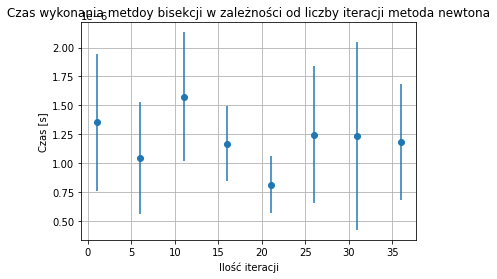

In [96]:
err = []
time = []
iterations = np.arange(1, 40, 5)
for iter in iterations:
    avg_time = %timeit -r 100 -n 100 -o main.newton(y, dy, d2y, -1.5, 0.40, 10e-10, iter)
    time.append(avg_time.average)
    err.append(avg_time.stdev)

plt.errorbar(iterations, time, yerr=err, marker='o', linestyle="none")
plt.ylabel("Czas [s]")
plt.xlabel("Ilość iteracji")
plt.title("Czas wykonania metdoy bisekcji w zależności od liczby iteracji metoda newtona")
plt.grid()
plt.show()

**Wnioski**

1. Zdecydowanie najlepszym sposobem przybliżania miejsc zerowych zadanych równań jest metoda newtona, która nieznacznie odbiega od reszty czasem wykonania, lecz zdecydowanie
 nadrabia bardzo szybką zbieżnością do rozwiązania. Potrzebowała jedynie 6 iteracji, żeby osiągnąć zadaną dokładność.
2. Metody bisekcji oraz siecznych nie wykazują się marginalnie złą zbieżnością, gdyż już po kilkunastu iteracjach osiągamy dokładność zbliżoną do przekazanej jako argument funkcji
3. Używając metody bisekcji dzielimy przedziały na pół, tutaj w przypadku gdy nie jesteśmy pewni, w którym miejscu szukać miejsca zerowego pojawia się spora losowość. Jeśli poszukiwany pierwiastek
 znajdzie się na skarjnym początku lub końcu przedziału, wtedy będziemy potrzebowali znaczącej liczby iteracji żeby do niego dotrzeć.